Some explorations. Goal: measure size of superdomains from kmaps.

In [3]:
import PyMca5 as mca
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

%matplotlib inline

specdir = '/users/zatterin/Documents/data/IHR_20161114/spec/'
fname = '20161115_E16088_fast_00220.spec'
rois = ['mpx4int', 'mpx4ro1', 'mpx4ro2']
sample_name = 'e16088'

scan_no = 4

In [4]:
scan = mca.specfile.Specfile(specdir+fname)[scan_no]
data = scan.data()
index_list = scan.alllabels()

rawdata = data[index_list.index(rois[1])]

motor_1 = data[index_list.index('adcX')]
motor_2 = data[index_list.index('adcY')]
new_shape = (int(scan.command().split()[8]), int(scan.command().split()[4]))
rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape

`rawdata` is the 60x60 image matrix.

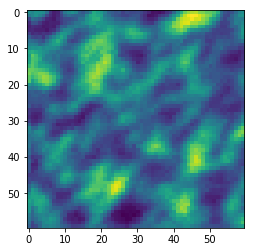

In [9]:
plt.imshow(rawdata)
# plt.contour(rawdata, [1569])

Apply a Sobel filter via `scipy.ndimage` for edge detection:

In [6]:
sx = nd.sobel(rawdata, axis=0, mode='constant')
sy = nd.sobel(rawdata, axis=1, mode='constant')
sob = np.hypot(sx,sy)

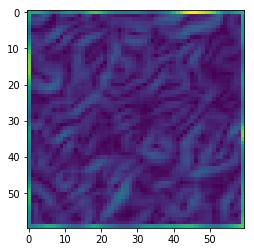

In [7]:
plt.imshow(sob, interpolation='nearest')

Histogram -- distribution of pixel intensity:

In [10]:
hist, bin_edges = np.histogram(rawdata, bins='auto')
bin_centres = 0.5*(bin_edges[:-1] + bin_edges[1:])

IndexError: list assignment index out of range

In [11]:
plt.plot(bin_centres,hist)

NameError: name 'bin_centres' is not defined

Generate random blobs, and threshold them:

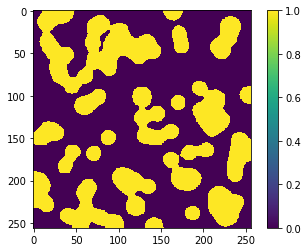

In [12]:
n = 10
l = 256
im = np.zeros((l,l))
points = l*np.random.random((2,n**2))

im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = nd.gaussian_filter(im, sigma=l/(4.*n))
mask = im > im.mean()

plt.imshow(mask); plt.colorbar()

Label individual regions (segmentation)

22


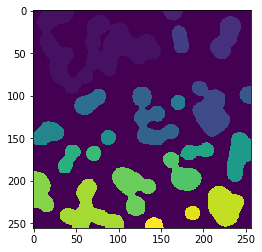

In [13]:
label_im, nb_labels = nd.label(mask)
plt.imshow(label_im)
print(nb_labels)

Sobel filter from `skimage`:

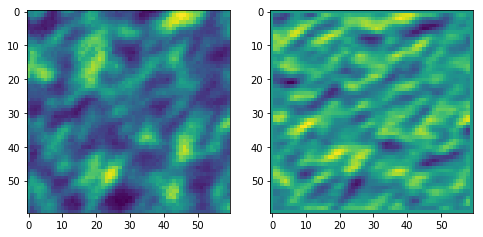

In [14]:
import skimage 
from skimage import filters
sobraw = filters.sobel_h(rawdata)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(rawdata)
plt.subplot(122)
plt.imshow(sobraw)

Otsu thresholding: algorithm chooses `val` for threshold.

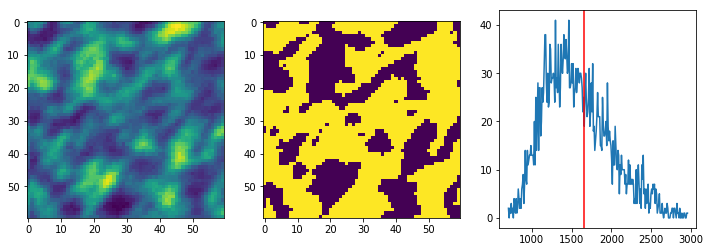

In [15]:
from skimage import exposure
val = filters.threshold_otsu(rawdata)
hist, bins_centre = exposure.histogram(rawdata)
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(rawdata)
plt.subplot(132)
plt.imshow(rawdata<val)
plt.subplot(133)
plt.plot(bins_centre,hist)
plt.axvline(val,color='red')

Label individual regions:

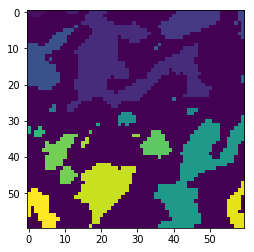

In [16]:
from skimage import measure
data_labels = measure.label(rawdata<val, background=1)
plt.imshow(data_labels)

In [24]:
pfm = np.genfromtxt('/users/zatterin/Desktop/e16088.004')

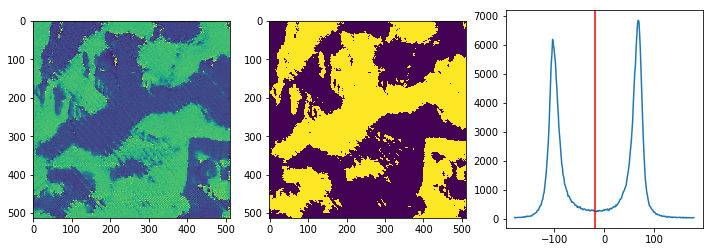

In [25]:
val = filters.threshold_otsu(pfm)
hist, bins_centre = exposure.histogram(pfm)
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(pfm)
plt.subplot(132)
plt.imshow(pfm<val)
plt.subplot(133)
plt.plot(bins_centre,hist)
plt.axvline(val,color='red')

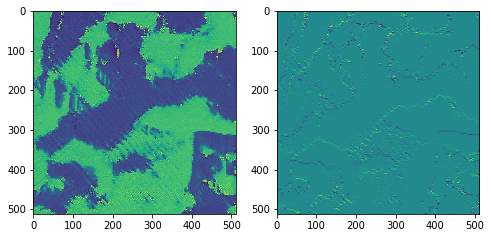

In [26]:
import skimage 
from skimage import filters
sobraw = filters.sobel_h(pfm)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(pfm)
plt.subplot(122)
plt.imshow(sobraw)